In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

In [2]:
mdata= pd.read_csv('C:/Users/amatu/Documents/train_imperson_without4n7_balanced_data.csv')

In [3]:
mdata.head()

,1,2,3,5,6,8,9,10,11,12,...,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0


In [4]:

#investigating presence of missing data

mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97044 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 113.3 MB


In [5]:
#data is complete

m1= mdata.dropna()
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97044 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 114.0 MB


In [6]:
#investigating presence of duplicate values
#is this because Dr Yoo rebalanced the classes with some form of bootstrapping? Hence we leave them in?
#I think we should assume data are iid anyway, hence keep duplicates
#if later we can see that the model does nt generalize well we can go back and eliminate them.


m2 = mdata.drop_duplicates()
m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96497 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 113.4 MB


In [108]:
#duplicate rows for reference

mdata[mdata.duplicated() == True].head()

,1,2,3,5,6,8,9,10,11,12,...,146,147,148,149,150,151,152,153,154,155
307,0,0,0,0.000017,0.000017,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
772,0,0,0,0.000011,0.000011,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
1565,0,0,0,0.000014,0.000014,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
7708,0,0,0,0.000037,0.000037,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
13105,0,0,0,0.000011,0.000011,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0


In [8]:
mdata.describe().T.describe()

,count,mean,std,min,25%,50%,75%,max
count,153.0,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,97044.0,0.150720,0.058346,0.016340,0.111776,0.144825,0.170367,0.442533
std,0.0,0.315662,0.124710,0.120557,0.301584,0.334706,0.357250,0.482821
min,97044.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97044.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97044.0,0.000008,0.000004,0.000000,0.000000,0.000000,0.000000,0.001530
75%,97044.0,0.037225,0.017885,0.000000,0.000000,0.000000,0.002253,1.000000
max,97044.0,1.000000,0.500003,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#separate X and Y

X, Y = mdata.loc[:, mdata.columns != '155'], mdata['155']

In [10]:
X.head()

,1,2,3,5,6,8,9,10,11,12,...,145,146,147,148,149,150,151,152,153,154
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


In [11]:
X.std().value_counts()

0.000000    74
0.014709    11
0.354444     2
0.003210     2
0.062765     2
0.015541     2
0.036295     1
0.008669     1
0.395372     1
0.286272     1
0.260131     1
0.009079     1
0.263952     1
0.000002     1
0.271498     1
0.002383     1
0.373863     1
0.013305     1
0.000414     1
0.005749     1
0.279912     1
0.001966     1
0.000030     1
0.145165     1
0.058399     1
0.001220     1
0.457477     1
0.457572     1
0.017849     1
0.000002     1
            ..
0.281597     1
0.116929     1
0.025487     1
0.000311     1
0.015720     1
0.220310     1
0.000998     1
0.032084     1
0.011518     1
0.456470     1
0.060476     1
0.109809     1
0.017885     1
0.126024     1
0.360078     1
0.262489     1
0.473930     1
0.001139     1
0.004540     1
0.450047     1
0.014432     1
0.021289     1
0.074530     1
0.021005     1
0.165173     1
0.002451     1
0.024858     1
0.010997     1
0.032883     1
0.224398     1
Length: 65, dtype: int64

In [89]:
#eliminate features with 0 standard deviation
#Xselected with 0 var taken out

from sklearn.feature_selection import VarianceThreshold




selector = VarianceThreshold()

X5=selector.fit(X)
col = X.columns[selector.get_support()]
Xselected= X.loc[:, col ]

In [90]:
Xselected.head()

,5,6,8,9,14,15,16,18,20,26,...,133,138,140,141,142,143,144,145,146,154
0,0.000066,0.000066,0.009150,0.009150,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000014,0.000014,0.000000,0.000000,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035528,0.035528,0.070588,0.070588,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005128,0.005128,0.094771,0.094771,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035116,0.035116,0.070588,0.070588,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
Xselected.shape

(97044, 78)

In [93]:
Xselected['14'].describe()

count    97044.000000
mean         0.999784
std          0.014709
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: 14, dtype: float64

In [21]:
#example of square root transform

xsqrt = np.sqrt(X1_sigma['5'])

In [22]:
xsqrt.skew()

3.7898261887995903

In [27]:
import matplotlib as plt
%matplotlib inline

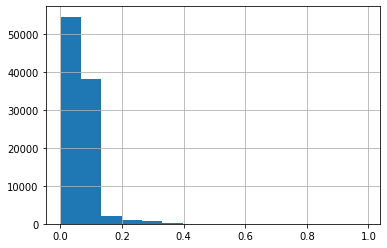

In [28]:
#histogran after the sqrt transformation

np.sqrt(X1_sigma['5']).hist(bins = 15)

In [95]:
#Normalizer transform norm 1

from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(Xselected)
normalizedX2 = scaler.transform(Xselected)

In [97]:
#normalised range 0 1


from sklearn.preprocessing import MinMaxScaler



scaler1 = MinMaxScaler().fit(Xselected)
scaled0_1=scaler1.transform(Xselected)



In [98]:
#Power and quantile transform. THe latter distorts correlation, hence try the former

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson').fit(Xselected)
poweredX2 = pt.transform(Xselected)


C:\Users\Student\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Student\Anaconda3\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [101]:
#datframe wiht norm 1

NX2df = pd.DataFrame(normalizedX2, columns = Xselected.columns)

NX2df.head()

,5,6,8,9,14,15,16,18,20,26,...,133,138,140,141,142,143,144,145,146,154
0,0.000015,0.000015,0.002125,0.002125,0.232240,0.232240,0.232240,0.232240,0.232240,0.232240,...,0.0,0.116120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000004,0.000004,0.000000,0.000000,0.252240,0.252240,0.252240,0.252240,0.252240,0.252240,...,0.0,0.126120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008282,0.008282,0.016454,0.016454,0.233105,0.233105,0.233105,0.233105,0.233105,0.233105,...,0.0,0.116553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001145,0.001145,0.021168,0.021168,0.223356,0.223356,0.223356,0.223356,0.223356,0.223356,...,0.0,0.111678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.008178,0.008178,0.016439,0.016439,0.232884,0.232884,0.232884,0.232884,0.232884,0.232884,...,0.0,0.116442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
np.median(NX2df.skew())

3.819768845905126

In [105]:
#dataframe powered gaussian 

PX2df = pd.DataFrame(poweredX2, columns= Xselected.columns)

PX2df.head()


,5,6,8,9,14,15,16,18,20,26,...,133,138,140,141,142,143,144,145,146,154
0,-1.527311,-1.527311,-0.883721,-0.883721,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,-0.00321,0.0,-1.151287,-0.105837,-1.165737,-0.105657,-0.028724,-0.45347,-0.45347,-0.788655
1,-1.553062,-1.553062,-1.090489,-1.090489,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,-0.00321,0.0,-1.151287,-0.105837,-1.165737,-0.105657,-0.028724,-0.45347,-0.45347,-0.788655
2,2.623799,2.623799,0.166931,0.166931,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,-0.00321,0.0,-1.151287,-0.105837,-1.165737,-0.105657,-0.028724,-0.45347,-0.45347,-0.788655
3,0.371013,0.371013,0.458800,0.458800,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,-0.00321,0.0,-1.151287,-0.105837,-1.165737,-0.105657,-0.028724,-0.45347,-0.45347,-0.788655
4,2.620509,2.620509,0.166931,0.166931,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,-0.00321,0.0,-1.151287,-0.105837,-1.165737,-0.105657,-0.028724,-0.45347,-0.45347,-0.788655


In [107]:
# dataframe normalised range 0_1

NX3df = pd.DataFrame(scaled0_1, columns= Xselected.columns)
NX3df.head()

,5,6,8,9,14,15,16,18,20,26,...,133,138,140,141,142,143,144,145,146,154
0,0.000064,0.000064,0.009150,0.009150,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000012,0.000012,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.036308,0.036308,0.070588,0.070588,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005238,0.005238,0.094771,0.094771,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035887,0.035887,0.070588,0.070588,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
PX2df.skew()

5        0.635083
6        0.635083
8        1.259153
9        1.259153
14     -67.957971
15     -67.957971
16     -67.957971
18     -67.957971
20     -67.957971
26     -67.957971
29     -67.957971
38      -0.028114
43     -67.957971
47       0.870651
48      17.065669
50      -0.881052
51       0.882182
52     -67.957971
61       0.418366
62     -67.957971
64      -0.215201
66      -0.981152
67       0.120504
68      -0.726600
70       3.217715
71       0.672478
72      31.104195
73      -0.894060
75       1.147929
76       1.567493
          ...    
105    179.849937
106     33.945872
107      5.290120
108      3.111769
109     15.929278
110      3.637986
111     46.932015
112     13.511611
113    179.849937
117    110.126632
118      2.864029
119      3.140320
120      3.081872
121     14.550269
122      4.965352
123     40.180226
125     25.462199
126      6.592108
127      6.592108
128      6.592108
129      6.592108
130      6.592108
140      0.085339
141      9.342772
142      0

In [37]:
np.median(PX2df.skew())

2.3079008562601975

In [38]:
norm_only = pd.DataFrame(normalizedX2, columns = X2.columns)
Y.columns=['Y']

norm_only=norm_only.join(Y)

norm_csv = norm_only.to_csv (r'C:\Users\Student\Git\AML_project\datasets\norm_csv1.csv')

In [43]:
from sklearn.ensemble import ExtraTreesClassifier 

model=ExtraTreesClassifier()
model.fit(normalizedX2,Y)
print(model.feature_importances_)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[2.69957432e-04 2.52779094e-04 9.43074733e-03 1.01256142e-02
 1.38631499e-02 7.81776438e-04 2.59995852e-02 5.12889399e-04
 3.91961229e-04 4.09378126e-03 9.27212624e-03 3.83133180e-02
 2.79360737e-03 6.98405617e-02 4.37709014e-04 1.04491640e-01
 9.23027515e-02 5.05135821e-03 8.89066697e-03 2.26294072e-02
 8.24992047e-04 2.08963674e-02 6.06347670e-02 4.05911125e-03
 1.96570649e-02 1.56532594e-01 2.95774954e-05 1.15651160e-01
 4.35084026e-03 3.15435032e-04 4.15436254e-04 5.33132357e-04
 6.47729989e-04 2.52603103e-02 1.26127391e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00438142e-04
 4.51959761e-03 2.23364883e-03 6.35642857e-03 0.00000000e+00
 9.71516457e-03 1.98698009e-04 6.92371256e-06 3.01540647e-05
 4.99837175e-03 9.34924000e-03 2.39276896e-05 1.39074289e-02
 1.88899160e-04 1.72225174e-04 0.00000000e+00 0.00000000e+00
 5.37190266e-04 1.38152553e-03 4.27000625e-03 1.32289259e-03
 9.66866876e-03 0.00000000e+00 0.00000000e+00 4.33508405e-03
 3.39084655e-03 1.367699

In [47]:
sorted((importance, col) for (col, importance) in enumerate(model.feature_importances_))[-20:]


[(0.009668668756705029, 60),
 (0.00971516457289202, 44),
 (0.010125614156106705, 3),
 (0.012612739122300426, 34),
 (0.013863149916225942, 4),
 (0.013907428908255737, 51),
 (0.019657064893976194, 24),
 (0.020563535399700652, 73),
 (0.020896367436212072, 21),
 (0.022629407170585633, 19),
 (0.025260310327203654, 33),
 (0.025999585248494946, 6),
 (0.03831331804177218, 11),
 (0.03850024864462352, 68),
 (0.06063476695369652, 22),
 (0.06984056167732125, 13),
 (0.09230275152200654, 16),
 (0.10449164035735992, 15),
 (0.11565116001012324, 27),
 (0.1565325944474235, 25)]

In [46]:
norm_only.columns[25]

'71'

In [ ]:
#bayesian  